In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

Having gone through the simple example, let's consider the following 2D-data:

This 2D example has three clusters. One of the clusters has the green and red labels (y) mixed, while the other two have homogenous labels.

Running the regular mixture of Gaussians algorithms, we will find three identical clusters. Instead, we want a method that

a) Learns the cluster means that splits the "mixed" cluster
b) Once the proper gaussian parameters are learned, we can then make decisions.


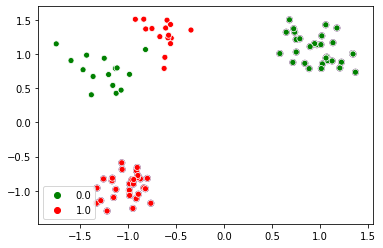

In [27]:
# How about this:

# Again, y = 0 = Green, y = 1 = Red
# cluster 0 (z = 0): all Green points
alpha = 0.05

N_0 = 30
u_0 = np.array([1,1])
sigma_0 = alpha*np.eye(len(u_0))
x_0 = np.random.multivariate_normal(u_0, sigma_0, N_0)
y_0 = np.zeros(N_0)
plt.scatter(x_0[:,0], x_0[:,1], c = y_0)


# cluster 1 (z = 1): All red points (y = 1)
N_1 = 30
u_1 = np.array([-1,-1])
sigma_1 = alpha*np.eye(len(u_1))
x_1 = np.random.multivariate_normal(u_1, sigma_1, N_1)
y_1 = np.ones(N_1)
plt.scatter(x_1[:,0], x_1[:,1],c = y_1)


# cluster 2 (z = 2): half of the points are green, half are red
N_2 = 15 # times 2 really
s = 0.3
u_2a = np.array([-1,1]) - s
u_2b = np.array([-1,1]) + s
sigma_2 = alpha*np.eye(len(u_2))
x_2a = np.random.multivariate_normal(u_2a, sigma_2, N_2)
y_2a = np.zeros(N_2)

x_2b = np.random.multivariate_normal(u_2b, sigma_2, N_2)
y_2b = np.ones(N_2)

x_2 = np.vstack((x_2a, x_2b))
y_2 = np.concatenate((y_2a, y_2b))


x = np.concatenate((x_0, x_1, x_2))
y = np.concatenate((y_0, y_1, y_2))

sns.scatterplot(x = x[:,0], y = x[:,1], hue = y, palette=['green', 'red'])

Interlude: how does this compare to the nuclear reactor problem?
The nuclear reactor problem is about modifying the posterior that is learned, which was a continuous random variable, the temperature. The analog in this case would be the means of the clusters.
Someone must have done this before---supervised gaussian mixture?

This looks to me like a problem best suited for something like SVM, which admittedly does not give us the distribution of the data, which is the whole point of the generative model.




In [ ]:
# For now, let's forge ahead and see what the decisions will look like.
